# Indonesia and SEA Region World Happiness Report

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import pi
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ragilhadi/world-happiness-report/master/world-happiness-report-2015-2022-cleaned.csv')
df.head()

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,4,Norway,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [3]:
df.columns

Index(['Unnamed: 0', 'Happiness Rank', 'Country', 'Region', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family (Social Support)',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Year'],
      dtype='object')

# Data Preparation

In [4]:
df = df.drop(['Unnamed: 0'], axis='columns')
df.head()

,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,4,Norway,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Happiness Rank                 1229 non-null   int64 
 1   Country                        1229 non-null   object
 2   Region                         1229 non-null   object
 3   Happiness Score                1229 non-null   object
 4   Economy (GDP per Capita)       1229 non-null   object
 5   Family (Social Support)        1229 non-null   object
 6   Health (Life Expectancy)       1229 non-null   object
 7   Freedom                        1229 non-null   object
 8   Trust (Government Corruption)  1229 non-null   object
 9   Generosity                     1229 non-null   object
 10  Year                           1229 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 105.7+ KB


In [6]:
def convert_object_to_float(x):
    x = x.replace(',','.')
    return float(x)

In [7]:
df['Happiness Score']= [convert_object_to_float(x) for x in df['Happiness Score']]
df['Economy (GDP per Capita)']= [convert_object_to_float(x) for x in df['Economy (GDP per Capita)']]
df['Family (Social Support)']= [convert_object_to_float(x) for x in df['Family (Social Support)']]
df['Health (Life Expectancy)']= [convert_object_to_float(x) for x in df['Health (Life Expectancy)']]
df['Trust (Government Corruption)']= [convert_object_to_float(x) for x in df['Trust (Government Corruption)']]
df['Freedom']= [convert_object_to_float(x) for x in df['Freedom']]
df['Generosity']= [convert_object_to_float(x) for x in df['Generosity']]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 1229 non-null   int64  
 1   Country                        1229 non-null   object 
 2   Region                         1229 non-null   object 
 3   Happiness Score                1229 non-null   float64
 4   Economy (GDP per Capita)       1229 non-null   float64
 5   Family (Social Support)        1229 non-null   float64
 6   Health (Life Expectancy)       1229 non-null   float64
 7   Freedom                        1229 non-null   float64
 8   Trust (Government Corruption)  1229 non-null   float64
 9   Generosity                     1229 non-null   float64
 10  Year                           1229 non-null   int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 105.7+ KB


In [9]:
df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
count,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000
mean,77.468674,5.428998,0.975343,1.033193,0.608082,0.440960,0.130756,0.201595,2018.447518
std,44.474181,1.115155,0.434249,0.329578,0.241340,0.154412,0.110818,0.115568,2.283610
min,1.000000,2.404000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,39.000000,4.584000,0.668000,0.828000,0.439000,0.345000,0.056000,0.118000,2016.000000
50%,77.000000,5.410000,1.012160,1.069336,0.639333,0.459000,0.096000,0.187000,2018.000000
75%,116.000000,6.223000,1.295843,1.273850,0.790810,0.559000,0.164000,0.258538,2020.000000
max,158.000000,7.842000,2.209000,1.644000,1.141000,0.740000,0.587000,0.838075,2022.000000


In [10]:
columns_scaling = [
       'Economy (GDP per Capita)', 'Family (Social Support)',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity']
new_columns_name = [
       'GDP per Capita', 'Social Support',
       'Life Expectancy', 'Freedoms', 'Trus Government',
       'Country Generosity']

scaler = MinMaxScaler()

df[new_columns_name] = scaler.fit_transform(df[columns_scaling])
df.head()

,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,GDP per Capita,Social Support,Life Expectancy,Freedoms,Trus Government,Country Generosity
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,0.632191,0.820870,0.825092,0.899419,0.715128,0.354121
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,0.589552,0.852938,0.830710,0.849689,0.240971,0.520598
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,0.600036,0.827603,0.766556,0.877541,0.823799,0.407350
3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,0.660480,0.809580,0.775819,0.905041,0.621857,0.414032
4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,0.600403,0.804507,0.793716,0.855365,0.561448,0.546622


In [11]:
df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,GDP per Capita,Social Support,Life Expectancy,Freedoms,Trus Government,Country Generosity
count,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000
mean,77.468674,5.428998,0.975343,1.033193,0.608082,0.440960,0.130756,0.201595,2018.447518,0.441532,0.628463,0.532938,0.595892,0.222753,0.240546
std,44.474181,1.115155,0.434249,0.329578,0.241340,0.154412,0.110818,0.115568,2.283610,0.196582,0.200473,0.211517,0.208666,0.188786,0.137897
min,1.000000,2.404000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,4.584000,0.668000,0.828000,0.439000,0.345000,0.056000,0.118000,2016.000000,0.302399,0.503650,0.384750,0.466216,0.095400,0.140799
50%,77.000000,5.410000,1.012160,1.069336,0.639333,0.459000,0.096000,0.187000,2018.000000,0.458198,0.650448,0.560327,0.620270,0.163543,0.223130
75%,116.000000,6.223000,1.295843,1.273850,0.790810,0.559000,0.164000,0.258538,2020.000000,0.586620,0.774848,0.693085,0.755405,0.279387,0.308491
max,158.000000,7.842000,2.209000,1.644000,1.141000,0.740000,0.587000,0.838075,2022.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# indonesia's happiness rating compared to SEA country's neighbors

## Indonesia Happiness Score Rank in 2022

In [12]:
df_2022 = df[df['Year'] == 2022]
df_2022.head()

,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,GDP per Capita,Social Support,Life Expectancy,Freedoms,Trus Government,Country Generosity
1083,1,Finland,Western Europe,7.821,1.892,1.258,0.775,0.736,0.534,0.109,2022,0.856496,0.765207,0.679229,0.994595,0.909710,0.130060
1084,2,Denmark,Western Europe,7.636,1.953,1.243,0.777,0.719,0.532,0.188,2022,0.884110,0.756083,0.680982,0.971622,0.906303,0.224324
1085,3,Iceland,Western Europe,7.557,1.936,1.320,0.803,0.718,0.191,0.270,2022,0.876415,0.802920,0.703769,0.970270,0.325383,0.322167
1086,4,Switzerland,Western Europe,7.512,2.026,1.226,0.822,0.677,0.461,0.147,2022,0.917157,0.745742,0.720421,0.914865,0.785349,0.175402
1087,5,Netherlands,Western Europe,7.415,1.945,1.206,0.787,0.651,0.419,0.271,2022,0.880489,0.733577,0.689746,0.879730,0.713799,0.323360


In [13]:
sea_2022 = df_2022[df_2022['Region'] == 'Southeastern Asia']
sea_2022

,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,GDP per Capita,Social Support,Life Expectancy,Freedoms,Trus Government,Country Generosity
1109,27,Singapore,Southeastern Asia,6.480,2.149,1.127,0.851,0.672,0.587,0.163,2022,0.972838,0.685523,0.745837,0.908108,1.000000,0.194493
1142,60,Philippines,Southeastern Asia,5.904,1.268,0.912,0.514,0.678,0.142,0.107,2022,0.574015,0.554745,0.450482,0.916216,0.241908,0.127674
1143,61,Thailand,Southeastern Asia,5.891,1.535,1.096,0.697,0.617,0.026,0.321,2022,0.694885,0.666667,0.610868,0.833784,0.044293,0.383021
1152,70,Malaysia,Southeastern Asia,5.711,1.689,0.938,0.620,0.654,0.126,0.213,2022,0.764599,0.570560,0.543383,0.883784,0.214651,0.254154
1159,77,Vietnam,Southeastern Asia,5.485,1.252,0.932,0.611,0.707,0.105,0.143,2022,0.566772,0.566910,0.535495,0.955405,0.178876,0.170629
1169,87,Indonesia,Southeastern Asia,5.240,1.382,0.883,0.539,0.620,0.047,0.468,2022,0.625622,0.537105,0.472393,0.837838,0.080068,0.558422
1177,95,Laos,Southeastern Asia,5.140,1.239,0.654,0.479,0.679,0.184,0.197,2022,0.560887,0.397810,0.419807,0.917568,0.313458,0.235062
1196,114,Cambodia,Southeastern Asia,4.640,1.019,0.732,0.505,0.740,0.068,0.166,2022,0.461295,0.445255,0.442594,1.000000,0.115843,0.198073
1208,126,Myanmar,Southeastern Asia,4.394,1.038,0.829,0.491,0.513,0.194,0.452,2022,0.469896,0.504258,0.430324,0.693243,0.330494,0.539331


In [14]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']
colors_div = ["#132C33", '#17869E', '#DADADA', '#D35151', '#331313']

In [17]:
global_happiness_2022 = df_2022['Happiness Score'].mean()
top_sea_2022 = sea_2022.iloc[0]
bottom_sea_2022 = sea_2022.iloc[-1]
other_sea_2022 = sea_2022.iloc[1:-1]
rank_sea_2022 = list(other_sea_2022['Happiness Rank'])

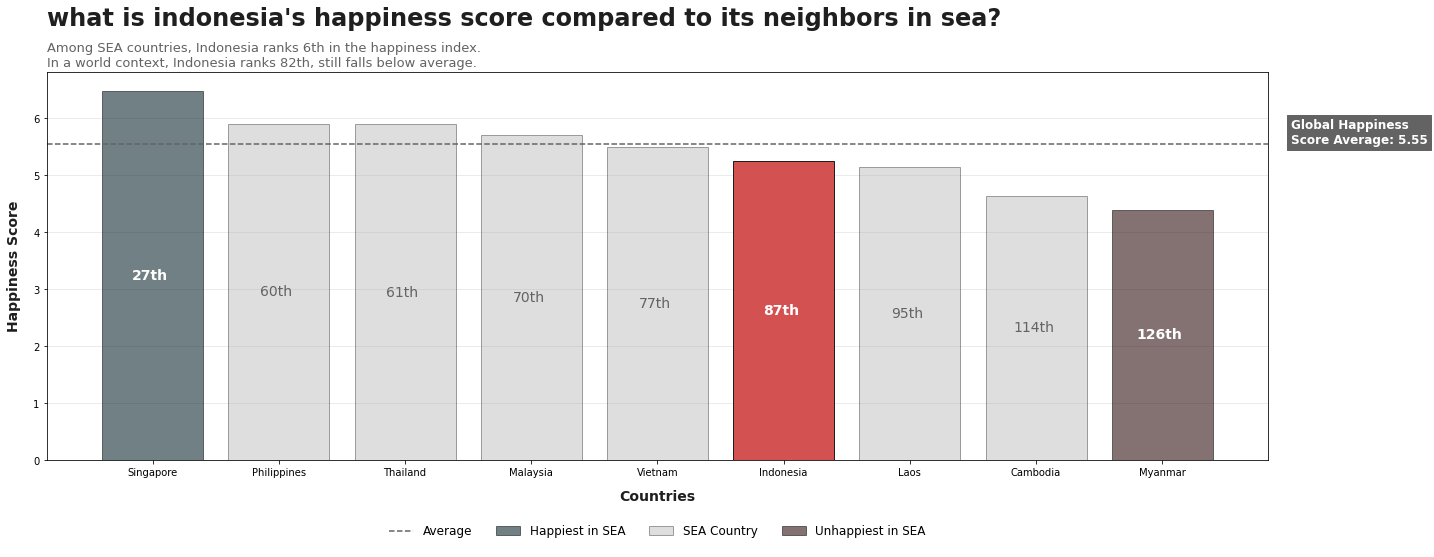

In [19]:
fig, ax = plt.subplots(figsize=(20, 8))
bars_top_sea = ax.bar(top_sea_2022['Country'], top_sea_2022['Happiness Score'], color=colors_blue[0], alpha=0.6, edgecolor=colors_dark[0])
bars_sea = ax.bar(other_sea_2022['Country'], other_sea_2022['Happiness Score'], color=colors_dark[3], alpha=0.4, edgecolor=colors_dark[0])
bars_bottom_sea = ax.bar(bottom_sea_2022['Country'], bottom_sea_2022['Happiness Score'], color=colors_red[0], alpha=0.6, edgecolor=colors_dark[0])
mean_line = ax.axhline(global_happiness_2022, linestyle='--', color=colors_dark[2])
ax.legend(["Average", 'Happiest in SEA','SEA Country','Unhappiest in SEA' ],
          loc='upper center',
          bbox_to_anchor=(0.5, -0.12),
          ncol=4,
          borderpad=1,
          frameon=False,
          fontsize=12
         )


xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel('Countries', fontsize=14, labelpad=12, fontweight='bold', color=colors_dark[0])
ax.set_ylabel('Happiness Score', fontsize=14, labelpad=12, fontweight='bold', color=colors_dark[0])



avg = ax.text(s=f'Global Happiness\nScore Average: {global_happiness_2022:.2f}',
             x=xmax*1.02,
             y=global_happiness_2022,
             fontsize=12,
             backgroundcolor=colors_dark[2],
             color='white',
             fontweight='bold')

# Indonesia Style Bar
bars_sea[4].set_alpha(1)
bars_sea[4].set_color(colors_red[3])
bars_sea[4].set_edgecolor(colors_dark[0])

# Put Text Ranking in Bar
for i, bar in enumerate(bars_sea) : 
    x=bar.get_x()
    y=bar.get_height()
    if i != 4 : 
        ax.text(
            s=f"{rank_sea_2022[i]}th",
            va='center', ha='center', 
            x=x+0.38, y=y/2,
            color=colors_dark[2],
            fontsize=14,
        )
    else : 
        ax.text(
        s=f"{rank_sea_2022[i]}th",
        va='center', ha='center', 
        x=x+0.38, y=y/2,
        color='white',
        fontsize=14,
        fontweight='bold'
    )
        
for i, bar in enumerate(bars_top_sea) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s=f"{top_sea_2022['Happiness Rank']}th",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
    
for i, bar in enumerate(bars_bottom_sea) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s=f"{bottom_sea_2022['Happiness Rank']}th",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
    
plt.text(s="what is indonesia's happiness score compared to its neighbors in sea?", ha='left', x=xmin, y=ymax*1.12, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("Among SEA countries, Indonesia ranks 6th in the happiness index.\nIn a world context, Indonesia ranks 82th, still falls below average.", loc='left', fontsize=13, color=colors_dark[2])  
plt.tight_layout()
plt.show()

## 6 Factor of Happiness Score with SEA Country

In [20]:
sea_2022

,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,GDP per Capita,Social Support,Life Expectancy,Freedoms,Trus Government,Country Generosity
1109,27,Singapore,Southeastern Asia,6.480,2.149,1.127,0.851,0.672,0.587,0.163,2022,0.972838,0.685523,0.745837,0.908108,1.000000,0.194493
1142,60,Philippines,Southeastern Asia,5.904,1.268,0.912,0.514,0.678,0.142,0.107,2022,0.574015,0.554745,0.450482,0.916216,0.241908,0.127674
1143,61,Thailand,Southeastern Asia,5.891,1.535,1.096,0.697,0.617,0.026,0.321,2022,0.694885,0.666667,0.610868,0.833784,0.044293,0.383021
1152,70,Malaysia,Southeastern Asia,5.711,1.689,0.938,0.620,0.654,0.126,0.213,2022,0.764599,0.570560,0.543383,0.883784,0.214651,0.254154
1159,77,Vietnam,Southeastern Asia,5.485,1.252,0.932,0.611,0.707,0.105,0.143,2022,0.566772,0.566910,0.535495,0.955405,0.178876,0.170629
1169,87,Indonesia,Southeastern Asia,5.240,1.382,0.883,0.539,0.620,0.047,0.468,2022,0.625622,0.537105,0.472393,0.837838,0.080068,0.558422
1177,95,Laos,Southeastern Asia,5.140,1.239,0.654,0.479,0.679,0.184,0.197,2022,0.560887,0.397810,0.419807,0.917568,0.313458,0.235062
1196,114,Cambodia,Southeastern Asia,4.640,1.019,0.732,0.505,0.740,0.068,0.166,2022,0.461295,0.445255,0.442594,1.000000,0.115843,0.198073
1208,126,Myanmar,Southeastern Asia,4.394,1.038,0.829,0.491,0.513,0.194,0.452,2022,0.469896,0.504258,0.430324,0.693243,0.330494,0.539331


In [21]:
new_columns_name

['GDP per Capita',
 'Social Support',
 'Life Expectancy',
 'Freedoms',
 'Trus Government',
 'Country Generosity']

In [22]:
def total(x):
    total = 0
    for col in x:
        total += col
    
    return total

In [23]:
columns_crop = new_columns_name.copy()
columns_crop.append('Country')
sea_2022_crop = sea_2022[columns_crop]
sea_2022_crop['total'] =  sea_2022_crop[new_columns_name].apply(total, axis='columns')
sea_2022_crop = sea_2022_crop.sort_values('total', ascending=False)
sea_2022_crop = sea_2022_crop.drop('total', axis='columns')
sea_2022_crop.set_index('Country', inplace=True)
sea_2022_crop

C:\Users\Ragil Prasetyo\AppData\Local\Temp\ipykernel_5460\2429151528.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sea_2022_crop['total'] =  sea_2022_crop[new_columns_name].apply(total, axis='columns')


,GDP per Capita,Social Support,Life Expectancy,Freedoms,Trus Government,Country Generosity
Country,,,,,,
Singapore,0.972838,0.685523,0.745837,0.908108,1.000000,0.194493
Thailand,0.694885,0.666667,0.610868,0.833784,0.044293,0.383021
Malaysia,0.764599,0.570560,0.543383,0.883784,0.214651,0.254154
Indonesia,0.625622,0.537105,0.472393,0.837838,0.080068,0.558422
Vietnam,0.566772,0.566910,0.535495,0.955405,0.178876,0.170629
Myanmar,0.469896,0.504258,0.430324,0.693243,0.330494,0.539331
Philippines,0.574015,0.554745,0.450482,0.916216,0.241908,0.127674
Laos,0.560887,0.397810,0.419807,0.917568,0.313458,0.235062
Cambodia,0.461295,0.445255,0.442594,1.000000,0.115843,0.198073


Text(0.0, 1.0, 'The 6 Factor have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.')

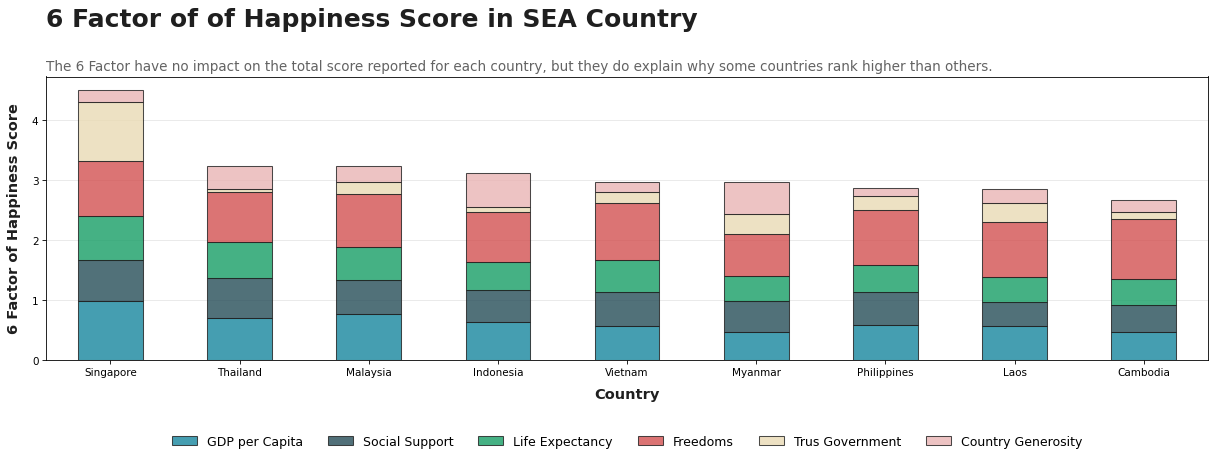

In [24]:
fig, ax = plt.subplots(figsize=(20, 5), dpi=75)

bars = sea_2022_crop.plot(kind='bar', stacked=True, ax=ax, color=colors_mix[0:7], alpha=0.8, edgecolor=colors_dark[0], rot=0)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=6, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.set_xlabel("Country", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("6 Factor of Happiness Score", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])

plt.text(s="6 Factor of of Happiness Score in SEA Country", ha='left', x=xmin, y=ymax*1.18, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("The 6 Factor have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.", loc='left', fontsize=13, color=colors_dark[2])  

## Compare Indonesia 6 Factor Happines Score with Singapore

In [25]:
categories = list(sea_2022)[11:]
N = len(categories)
sea_values = sea_2022[categories]
sea_values_top = sea_values.iloc[0].values.tolist()
sea_values_top += sea_values_top[:1]
sea_values_indonesia = sea_values.iloc[5].values.tolist()
sea_values_indonesia += sea_values_indonesia[:1]

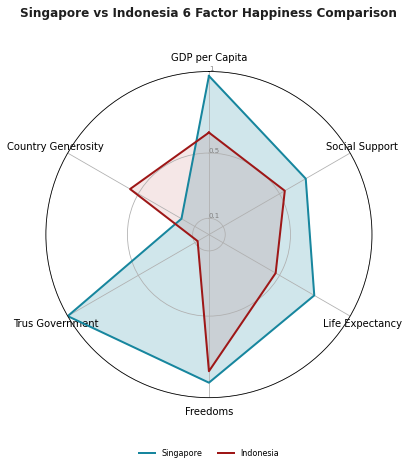

In [26]:
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
# print(angles)
plt.figure(figsize=(16,6))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
plt.yticks([0.1,0.5,1,1.5,2], ["0.1","0.5","1",'1.5','2'], color="grey", size=7)
plt.ylim(0,1)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()


ax.plot(angles, sea_values_top, linewidth=2, linestyle='solid',color=colors_blue[2], label="Singapore")
ax.fill(angles, sea_values_top, color=colors_blue[2], alpha=0.2)


ax.plot(angles, sea_values_indonesia, linewidth=2, linestyle='solid', color=colors_red[2], label="Indonesia")
ax.fill(angles, sea_values_indonesia, color=colors_red[2], alpha=0.1)

plt.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.12),
           ncol=2,
           borderpad=1,
           frameon=False,
           fontsize=8,
          )

ax.set_title('Singapore vs Indonesia 6 Factor Happiness Comparison',y=1.15, fontsize=12, fontweight='bold', color=colors_dark[0])
plt.show()

## Indonesia & SEA Country Happiness Score History

In [27]:
df.head()

,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,GDP per Capita,Social Support,Life Expectancy,Freedoms,Trus Government,Country Generosity
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,0.632191,0.820870,0.825092,0.899419,0.715128,0.354121
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,0.589552,0.852938,0.830710,0.849689,0.240971,0.520598
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,0.600036,0.827603,0.766556,0.877541,0.823799,0.407350
3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,0.660480,0.809580,0.775819,0.905041,0.621857,0.414032
4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,0.600403,0.804507,0.793716,0.855365,0.561448,0.546622


In [28]:
df_sea_history['Happiness Score'].mean()

NameError: name 'df_sea_history' is not defined

In [29]:
df_indonesia_history = df[df['Country'] == 'Indonesia']
df_sea_history = df[df['Region'] == 'Southeastern Asia']
df_sea_history = df_sea_history[df_sea_history['Country'] != 'Indonesia']
mean_sea_score_history = df_sea_history['Happiness Score'].mean()

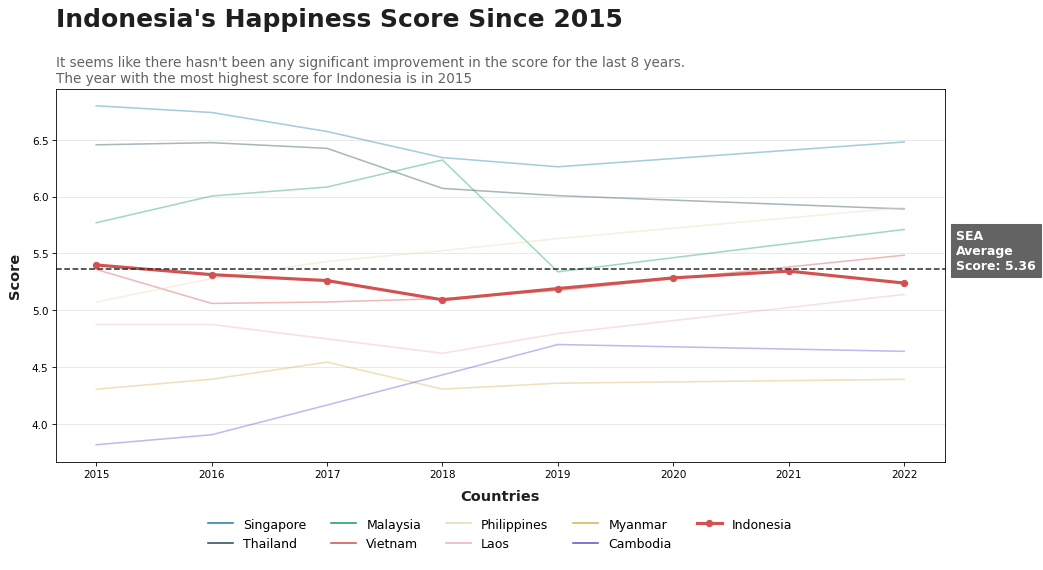

In [30]:
fig, ax = plt.subplots(figsize=(14, 8), dpi=75)

line_sea_history = sns.lineplot(data=df_sea_history, x='Year', y='Happiness Score', hue='Country', alpha=0.4, ax=ax, palette=colors_mix[:9])
line_indo_history = ax.plot(df_indonesia_history.Year, df_indonesia_history['Happiness Score'], alpha=1, marker='o', color=colors_red[3], linewidth=3, label='Indonesia')
line_sea_mean = ax.axhline(mean_sea_score_history, linestyle='--', alpha=1, color=colors_dark[1])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Score", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

avgl  = ax.text(
    s="SEA \nAverage\nScore: {:.2f}".format(mean_sea_score_history),
    x=xmax+0.1,
    y=mean_sea_score_history,
    backgroundcolor=colors_dark[2],
    fontsize=12,
    fontweight='bold',
    color='white'
)

plt.text(s="Indonesia's Happiness Score Since 2015", ha='left', x=xmin, y=ymax*1.08, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("It seems like there hasn't been any significant improvement in the score for the last 8 years.\nThe year with the most highest score for Indonesia is in 2015", loc='left', fontsize=13, color=colors_dark[2])  
plt.tight_layout()
plt.show()

# SEA Performance Compare to other continent

In [31]:
df.head()

,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,GDP per Capita,Social Support,Life Expectancy,Freedoms,Trus Government,Country Generosity
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,0.632191,0.820870,0.825092,0.899419,0.715128,0.354121
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,0.589552,0.852938,0.830710,0.849689,0.240971,0.520598
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,0.600036,0.827603,0.766556,0.877541,0.823799,0.407350
3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,0.660480,0.809580,0.775819,0.905041,0.621857,0.414032
4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,0.600403,0.804507,0.793716,0.855365,0.561448,0.546622


In [32]:
df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia', '-',
       'North America and ANZ', 'Middle East and North Africa',
       'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'South Asia'], dtype=object)

In [33]:
df_region_2022 = pd.pivot_table(data=df_2022,index=['Region'], aggfunc=np.mean)
df_region_2022 = df_region_2022.reset_index()
df_region_2022 = df_region_2022.drop([0])
df_region_2022 = df_region_2022.sort_values('Happiness Score')
df_region_2022

,Region,Country Generosity,Economy (GDP per Capita),Family (Social Support),Freedom,Freedoms,GDP per Capita,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Life Expectancy,Social Support,Trus Government,Trust (Government Corruption),Year
8,Southern Asia,0.194891,1.072167,0.520167,0.460833,0.622748,0.485363,0.163333,118.000000,4.265167,0.479000,0.419807,0.316403,0.180579,0.106000,2022
9,Sub-Saharan Africa,0.204093,0.955318,0.610045,0.440909,0.595823,0.432466,0.171045,115.090909,4.543955,0.356818,0.312724,0.371074,0.187781,0.110227,2022
5,Middle East and Northern Africa,0.132813,1.536846,0.799846,0.418000,0.564865,0.695720,0.111308,87.076923,5.213538,0.636077,0.557473,0.486524,0.236404,0.138769,2022
7,Southeastern Asia,0.295651,1.396778,0.900333,0.653333,0.882883,0.632312,0.247778,79.666667,5.431667,0.589667,0.516798,0.547648,0.279955,0.164333,2022
3,Eastern Asia,0.138412,1.646750,1.032500,0.501250,0.677365,0.745473,0.116000,63.250000,5.830000,0.719750,0.630806,0.628041,0.253407,0.148750,2022
2,Central and Eastern Europe,0.159542,1.548250,1.071292,0.549667,0.742793,0.700883,0.133708,58.416667,5.899625,0.647917,0.567850,0.651637,0.168512,0.098917,2022
4,Latin America and Caribbean,0.136357,1.352889,0.990778,0.574000,0.775676,0.612444,0.114278,56.888889,5.933056,0.649722,0.569432,0.602663,0.185027,0.108611,2022
10,Western Europe,0.181368,1.897263,1.156947,0.599579,0.810242,0.858879,0.152000,19.578947,6.944105,0.788000,0.690622,0.703739,0.502107,0.294737,2022
6,North America,0.260716,1.934000,1.185000,0.616500,0.833108,0.875509,0.218500,15.500000,7.001000,0.705500,0.618317,0.720803,0.464225,0.272500,2022
1,Australia and New Zealand,0.300092,1.876000,1.219000,0.678000,0.916216,0.849253,0.251500,11.000000,7.181000,0.762000,0.667835,0.741484,0.701874,0.412000,2022


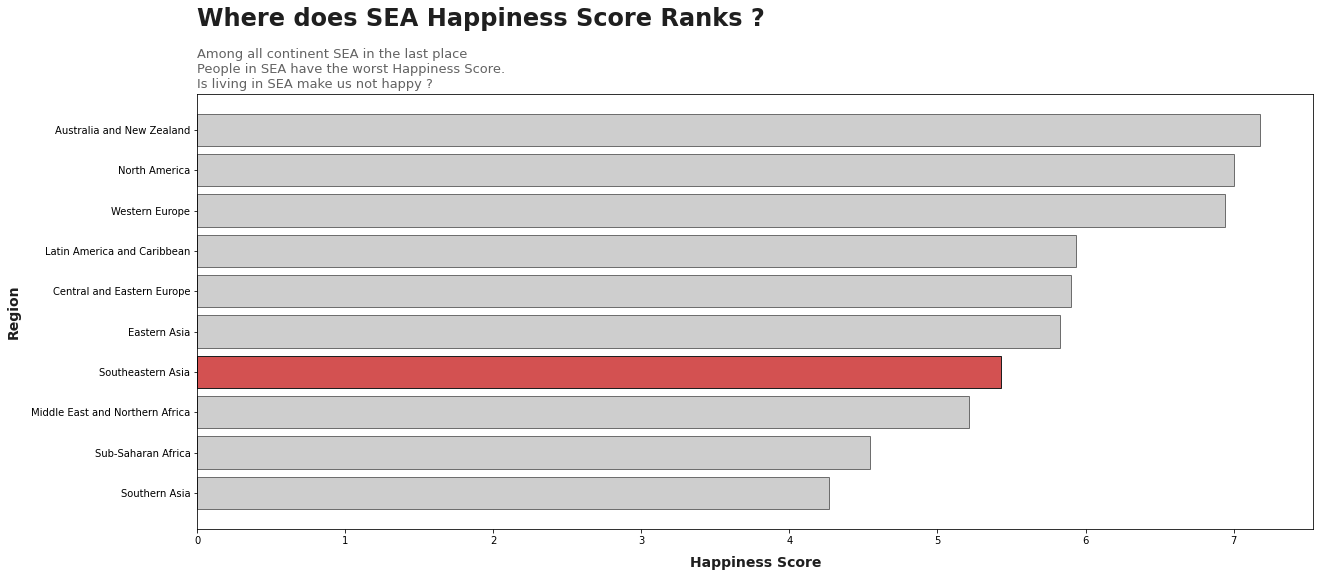

In [34]:
fig, ax = plt.subplots(figsize=(20, 8))
bars_region_ranking = ax.barh(df_region_2022['Region'], df_region_2022['Happiness Score'],  color=colors_dark[3], alpha=0.6, edgecolor=colors_dark[0])

bars_region_ranking[3].set_alpha(1)
bars_region_ranking[3].set_color(colors_red[3])
bars_region_ranking[3].set_edgecolor(colors_dark[0])

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

ax.set_xlabel("Happiness Score", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Region", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])

plt.text(s="Where does SEA Happiness Score Ranks ?", ha='left', x=xmin, y=ymax*1.17, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("Among all continent SEA in the last place\nPeople in SEA have the worst Happiness Score.\nIs living in SEA make us not happy ?", loc='left', fontsize=13, color=colors_dark[2])  
plt.show()